# Predicting NBA Win Conditions

In [129]:
# load packages
import pandas as pd
import numpy as np
import math
import sklearn
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### NBA Data 2012-2018

In [4]:
# import data
df_raw = pd.read_csv('../data/2012-18_teamBoxScore.csv')
df_raw.head()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,WAS,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,CLE,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
2,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,BOS,...,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832
3,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,MIA,...,62.7083,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,94.9832,94.9832
4,2012-10-30,22:30,Regular,Foster,Scott,Zielinski,Gary,Dalen,Eric,DAL,...,58.6458,99.3678,108.1034,-8.7356,0.5000,18.6567,1.7143,42.8571,91.5790,91.5790


Let's eliminate some columns.

In [17]:
print(df_raw.shape)

# set max columns displayed 
pd.options.display.max_columns = None
display(df_raw)

(14758, 123)


,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,teamMin,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamFIC,teamFIC40,teamOrtg,teamDrtg,teamEDiff,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptMin,opptDayOff,opptPTS,opptAST,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.250,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.000,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,46.1538,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.000,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,46.1538,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.250,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
2,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,BOS,East,Atlantic,Away,Loss,240,0,107,24,16,4,2,23,75,39,0.5200,62,33,0.5323,13,6,0.4615,28,23,0.8214,7,34,41,25,29,22,31,0,0,0,0,53.2468,61.5385,0.6127,0.5600,18.4211,87.1795,15.4859,4.2113,2.1056,3.2258,1.4267,75.250,62.7083,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,MIA,East,Southeast,Home,Win,240,0,120,25,8,8,5,20,79,43,0.5443,63,35,0.5556,16,8,0.5000,32,26,0.8125,5,31,36,31,31,31,27,0,0,0,0,46.7532,58.1395,0.6446,0.5949,13.8889,86.1111,7.9145,8.4225,5.2641,7.9365,1.5190,97.000,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832
3,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,MIA,East,Southeast,Home,Win,240,0,120,25,8,8,5,20,79,43,0.5443,63,35,0.5556,16,8,0.5000,32,26,0.8125,5,31,36,31,31,31,27,0,0,0,0,46.7532,58.1395,0.6446,0.5949,12.8205,81.5789,7.9145,8.4225,5.2641,7.9365,1.5190,97.000,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,BOS,East,Atlantic,Away,Loss,240,0,107,24,16,4,2,23,75,39,0.5200,62,33,0.5323,13,6,0.4615,28,23,0.8214,7,34,41,25,29,22,31,0,0,0,0,53.2468,61.5385,0.6127,0.5600,17.0732,82.9268,15.4859,4.2113,2.1056,3.2258,1.4267,75.250,62.7083,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,94.9832,94.9832
4,2012-10-30,22:30,Regular,Foster,Scott,Zielinski,Gary,Dalen,Eric,DAL,West,Southwest,Away,Win,240,0,99,22,12,9,5,25,85,40,0.4706,70,35,0.5000,15,5,0.3333,18,14,0.7778,9,31,40,25,23,26,25,0,0,0,0,46.5116,55.0000,0.5327,0.5000,22.5000,67.3913,11.4373,9.8276,5.4598,7.1429,1.1647,72.250,60.2083,108.1034,99.3678,8.7356,0.4545,17.333

In [72]:
df_proc = df_raw[['teamLoc', 'teamRslt', 'teamDayOff', 'teamPTS', 'teamAST', 'teamTO', 'teamSTL', 'teamBLK',
                  'teamPF', 'teamFGA', 'teamFGM', 'team2PA', 'team2PM', 'team3PA', 'team3PM', 'teamFTA', 'teamFTM',
                  'teamORB', 'teamDRB', 'teamTRB']]
df_proc.head()

,teamLoc,teamRslt,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,team2PA,team2PM,team3PA,team3PM,teamFTA,teamFTM,teamORB,teamDRB,teamTRB
0,Away,Loss,0,84,26,13,11,10,19,90,32,58,24,32,8,20,12,18,21,39
1,Home,Win,0,94,22,21,7,5,21,79,36,59,29,20,7,22,15,18,36,54
2,Away,Loss,0,107,24,16,4,2,23,75,39,62,33,13,6,28,23,7,34,41
3,Home,Win,0,120,25,8,8,5,20,79,43,63,35,16,8,32,26,5,31,36
4,Away,Win,0,99,22,12,9,5,25,85,40,70,35,15,5,18,14,9,31,40


In [73]:
# We will need to change the teamLoc and teamRslt values from integer to numeric
df_proc['teamLoc'] = np.where(df_proc.loc[:, 'teamLoc']=='Home', 1, 0)
df_proc['teamRslt'] = np.where(df_proc.loc[:, 'teamRslt']=='Win', 1, 0)

df_proc.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,teamLoc,teamRslt,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,team2PA,team2PM,team3PA,team3PM,teamFTA,teamFTM,teamORB,teamDRB,teamTRB
0,0,0,0,84,26,13,11,10,19,90,32,58,24,32,8,20,12,18,21,39
1,1,1,0,94,22,21,7,5,21,79,36,59,29,20,7,22,15,18,36,54
2,0,0,0,107,24,16,4,2,23,75,39,62,33,13,6,28,23,7,34,41
3,1,1,0,120,25,8,8,5,20,79,43,63,35,16,8,32,26,5,31,36
4,0,1,0,99,22,12,9,5,25,85,40,70,35,15,5,18,14,9,31,40


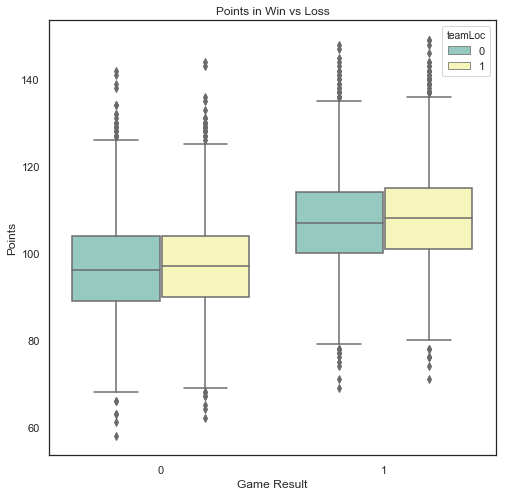

In [74]:
# Let's plot some data
plt.subplots(figsize=(8, 8))
sns.set(style='white')

sns.boxplot(x='teamRslt', y='teamPTS', hue='teamLoc', data=df_proc, palette='Set3')
plt.xlabel('Game Result')
plt.ylabel('Points')
plt.title('Points in Win vs Loss')
plt.show()

That certainly makes sense. Home teams scored slightly more in both wins and losses over away teams.

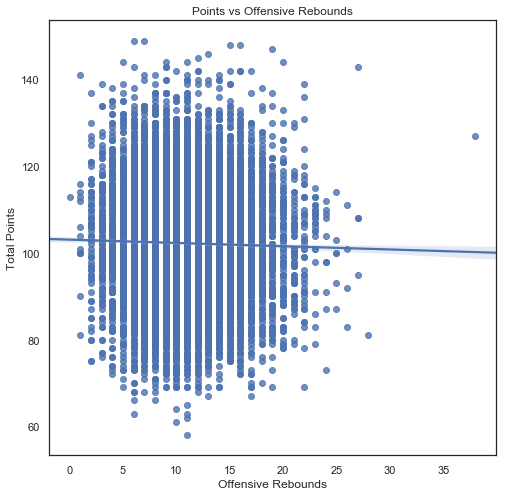

In [79]:
plt.subplots(figsize=(8, 8))
sns.set(style='white')
sns.regplot(x='teamORB', y='teamPTS', data=df_proc)
plt.title('Points vs Offensive Rebounds')
plt.xlabel('Offensive Rebounds')
plt.ylabel('Total Points')
plt.show()

### Models

In [142]:
# Let's prepare the data for training and testing our models
from sklearn.model_selection import train_test_split

X = df_proc.drop(['teamRslt'], axis=1)
y = df_proc['teamRslt'].values.reshape(-1, 1).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)
print(X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0])

11806 2952 11806 2952


#### Vanilla Logistic Model

In [143]:
lr = linear_model.LogisticRegression(C=1)
model = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Coefficients:\n', model.coef_)
print('R2 score: ', lr.score(X_test, y_test))

# confusion matrix
c_mat = confusion_matrix(y_pred, y_test)
print('Confusion Matrix:\n', c_mat)

Coefficients:
 [[ 0.43648952 -0.04248049  0.37011743  0.03178427 -0.33014831  0.40125988
   0.12907835 -0.06876518 -0.25223101 -0.26855773 -0.09745207 -0.07562852
  -0.15477895 -0.1929292  -0.12765758 -0.1665061   0.11221564  0.1232259
   0.23544154]]
R2 score:  0.8404471544715447
Confusion Matrix:
 [[1226  232]
 [ 239 1255]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Ridge Regression Model

In [145]:
# calculate regularization factor lambda
ridge_cv = linear_model.RidgeCV()
ridge_alpha = ridge_cv.fit(X_train, y_train).alpha_
print(ridge_alpha)

# Ridge regression(l2)
ridge = linear_model.LogisticRegression(C=(1/ridge_alpha), penalty='l2')
ridge_model = ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
c_mat = confusion_matrix(y_pred, y_test)
print('Coefficients:\n', ridge_model.coef_)
print('R2 Score: ', ridge.score(X_test, y_test))
print('Confusion matrix:\n', c_mat)


10.0
Coefficients:
 [[ 0.42112841 -0.04417489  0.19471759  0.0318102  -0.33405927  0.40050709
   0.12847889 -0.06901406 -0.25484997  0.0222515  -0.09928643 -0.017065
  -0.15556354  0.03931649 -0.12905351  0.00811747  0.11478773  0.12142389
   0.23621161]]
R2 Score:  0.8414634146341463
Confusion matrix:
 [[1225  228]
 [ 240 1259]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Lasso Regression Model

In [147]:
lasso_cv = linear_model.LassoCV()
lasso_alpha = lasso_cv.fit(X_train, y_train).alpha_
print(lasso_alpha)

lasso = linear_model.LogisticRegression(C=(1/lasso_alpha), penalty='l1')
lasso_model = lasso.fit(X_train, y_train)
print('Coefficients:\n', lasso_model.coef_)
print('R2 Score: ', lasso.score(X_test, y_test))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0027958785187454697
Coefficients:
 [[ 0.43904695 -0.04167054  0.05054217  0.03186495 -0.32860958  0.40110781
   0.12926018 -0.06869038 -0.1322447   0.12289555 -0.21566883  0.17231074
  -0.27336038  0.37505817 -0.12702562  0.15319394  0.20802582  0.22053715
   0.1382759 ]]
R2 Score:  0.8407859078590786


The ridge regression model is the most accurate but not by a big margin. Let's take a closer look.

In [149]:
# Display ridge model metrics
print(X.columns.values)
df_ridge = pd.DataFrame(data=ridge_model.coef_, columns=X.columns.values)
display(df_ridge)

['teamLoc' 'teamDayOff' 'teamPTS' 'teamAST' 'teamTO' 'teamSTL' 'teamBLK'
 'teamPF' 'teamFGA' 'teamFGM' 'team2PA' 'team2PM' 'team3PA' 'team3PM'
 'teamFTA' 'teamFTM' 'teamORB' 'teamDRB' 'teamTRB']


,teamLoc,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,team2PA,team2PM,team3PA,team3PM,teamFTA,teamFTM,teamORB,teamDRB,teamTRB
0,0.421128,-0.044175,0.194718,0.03181,-0.334059,0.400507,0.128479,-0.069014,-0.25485,0.022251,-0.099286,-0.017065,-0.155564,0.039316,-0.129054,0.008117,0.114788,0.121424,0.236212


It looks like home court advantage is a real thing. It has the highest coefficient along with team steals. Conversely, and perhaps surprisingly, field goals made and free throws made are not very strongly correlated with winning.